In [ ]:
! pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Mendownload dan menyiapkan dataset 
! kaggle datasets download crowdflower/twitter-airline-sentiment

twitter-airline-sentiment.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Mengekstrak file zip dataset
import zipfile

local_zip = '/content/twitter-airline-sentiment.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Mengubah dataset menjadi dataframe
import pandas as pd

df = pd.read_csv('/content/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df = df[['text', 'airline_sentiment']]

In [ ]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
df.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

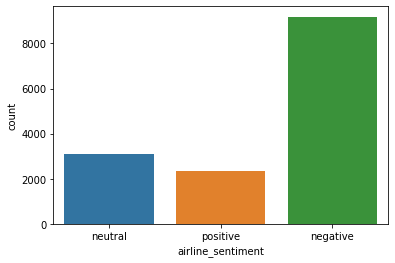

In [ ]:
import seaborn as sns

sns.countplot(x='airline_sentiment', data=df)

In [ ]:
from collections import Counter

print(Counter(df.airline_sentiment))

Counter({'negative': 9178, 'neutral': 3099, 'positive': 2363})


# Preprocess Text

In [ ]:
! pip install nltk
#installing tweet-preprocessor
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import preprocessor as p

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# import nltk for stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'other', 'ma', 'd', 'all', 'am', 'again', 'for', "wouldn't", 'about', 'i', 'just', 'your', 'herself', 't', 'hadn', 'doing', 'yours', "hadn't", "mustn't", 'between', 'when', 'be', 'here', 'same', 'himself', 'had', 'out', 'some', "aren't", "doesn't", 'itself', 'did', 're', 'these', 'ours', 'than', 'that', 'off', 'such', "won't", 'an', 'into', 'after', 'during', 'no', "you've", 'didn', "weren't", 'they', 'most', 'should', 'only', 'hers', 'do', 'mightn', 'was', 'on', 'shan', "you're", 'o', 'themselves', 'this', 'her', 'both', "don't", 'with', 'few', 'aren', "couldn't", 'me', 'are', 'we', 'can', 'the', 'over', 'nor', 'he', 'each', 'own', 'ourselves', 'who', "that'll", "didn't", 'to', "it's", 'as', 'or', 'but', 'more', 'myself', 'shouldn', 'its', 'not', 'them', 've', "isn't", 'whom', 'wouldn', 'once', 'couldn', 'a', 'and', 'their', "haven't", 'so', 's', 'at', "shan't", 'haven', 'which', 'because', 'yourself', 'it', "hasn't", 'my', 'don', 'does', "wasn't", 'above', 'why', 'm', 'further', 'be

In [ ]:
contractions_dict = {"ain't": "are not", "'s":"is", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "‘cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "that'd": "that would", "that'd've": "that would have", "there'd": "there would", "there'd've": "there would have", "they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not","what'll": "what will", "what'll've": "what will have", "what're": "what are", "what've": "what have", "when've": "when have", "where'd": "where did", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who've": "who have", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [ ]:
import re

contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
  text = []
  def replace(match):
    return contractions_dict[match.group(0)]
  for i in s.split():
    text.append(contractions_re.sub(replace, i))
  return ' '.join(text)

In [ ]:
import string
import unicodedata

def prepro(text):
  text = unicodedata.normalize('NFKD', text)
  text = text.lower()
  text = text.strip()
  text = re.compile('<.*?>').sub('', text)
  text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
  text = re.sub('\s+', ' ', text)  
  text = re.sub(r'\[[0-9]*\]',' ',text) 
  text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
  text = re.sub(r'\d',' ',text) 
  text = re.sub(r'\s+',' ',text)
  return text

In [ ]:
import re

def lem(df):
  wordlem = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))
  for i in range(len(df)):
    text = []

    sen = df['text'][i]
    sen = sen.replace("’’", '"')
    sen = sen.replace("‘‘", '"')
    sen = sen.replace("’", "'")
    sen = sen.replace("‘", "'")
    sen = p.clean(sen)
    sen = expand_contractions(sen)
    sen = prepro(sen)

    for j in sen.split():
      if j not in stop_words: 
        text.append(wordlem.lemmatize(j))
    if len(text) > 4:
      df['text'][i] = ' '.join(text)
    else:
      df['text'][i] = 'nothing'
  return df

# Create Datasets for Training and Evaluation

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_df, valid_df = train_test_split(df, random_state=42, train_size=0.8, stratify=df.airline_sentiment.values)

train_df.shape, valid_df.shape

((11712, 2), (2928, 2))

In [ ]:
train_df = train_df.copy().reset_index(drop=True)

In [ ]:
valid_df = valid_df.copy().reset_index(drop=True)

In [ ]:
train_df = lem(train_df)
valid_df = lem(valid_df)

In [ ]:
train_df = train_df[train_df['text']!='nothing'].reset_index(drop=True)
valid_df = valid_df[valid_df['text']!='nothing'].reset_index(drop=True)

# WordCloud Analysis

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
text_neu = " ".join(text for text in train_df.text[train_df['airline_sentiment']=='neutral'])
print ("There are {} words in the combination of all review.".format(len(text_neu)))

There are 93534 words in the combination of all review.


In [ ]:
text_pos = " ".join(text for text in train_df.text[train_df['airline_sentiment']=='positive'])
print ("There are {} words in the combination of all review.".format(len(text_pos)))

There are 72395 words in the combination of all review.


In [ ]:
text_neg = " ".join(text for text in train_df.text[train_df['airline_sentiment']=='negative'])
print ("There are {} words in the combination of all review.".format(len(text_neg)))

There are 437470 words in the combination of all review.


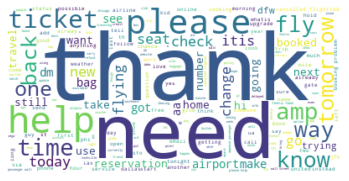

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["flight", "plane", 'u'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_neu)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

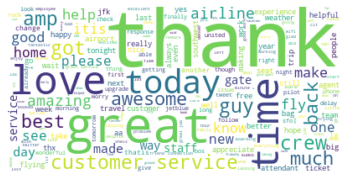

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["flight", "plane", 'u'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_pos)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

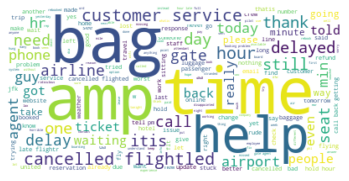

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["flight", "plane", 'u'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_neg)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Preprocessing

In [ ]:
# Melakukan proses one-hot-encoding pada label dan membuat train dataframe baru
category = pd.get_dummies(train_df.airline_sentiment)
train_df = pd.concat([train_df, category], axis=1)
train_df = train_df.drop(columns='airline_sentiment')
train_df

,text,negative,neutral,positive
0,used get email pre purchase snack time check g...,0,1,0
1,flight cancelled flightlations one due weather...,1,0,0
2,frustrated idea great crew thanks,0,0,1
3,narrowly made standby lot snag trip,1,0,0
4,pay accommodation one cancelled flightling rea...,1,0,0
...,...,...,...,...
9525,providing poor customer service responding com...,1,0,0
9526,flight booking problem section website seems b...,1,0,0
9527,thanks hour flight pit phx zero entertainment ...,1,0,0
9528,assigned seating cousin amp probably cannot si...,0,1,0


In [ ]:
# Melakukan proses one-hot-encoding pada label dan membuat train dataframe baru
category = pd.get_dummies(valid_df.airline_sentiment)
valid_df = pd.concat([valid_df, category], axis=1)
valid_df = valid_df.drop(columns='airline_sentiment')
valid_df

,text,negative,neutral,positive
0,would say delay likely thanks much,0,0,1
1,cheated sorry never given wife worst start hon...,1,0,0
2,disappointed u didnt honor credit given ur mis...,1,0,0
3,airline embarrassing get bad weather fault res...,1,0,0
4,flight delayed amp cannot talk reach anyone cu...,1,0,0
...,...,...,...,...
2379,itis hard stay upset someone least try show re...,1,0,0
2380,issuing travel advisory clt thursday significa...,0,1,0
2381,next arrived atlanta waited full hour luggage ...,1,0,0
2382,look like today th consecutive delayed flight ...,1,0,0


In [ ]:
# Mengubah nilai-nilai pada dataframe menjadi tipe array
train_text = train_df['text'].values
valid_text = valid_df['text'].values

target_train = train_df[list(train_df.columns.values[1:])].values
target_valid = valid_df[list(valid_df.columns.values[1:])].values

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.metrics import Precision, Recall
from keras.optimizers import SGD

# Mengubah setiap kata pada dataset menjadi bilangan numerik
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(train_text)
tokenizer.fit_on_texts(valid_text)

# Mengonversi setiap sampel menjadi sequence
sequence_train = tokenizer.texts_to_sequences(train_text)
sequence_valid = tokenizer.texts_to_sequences(valid_text)

# Membuat setiap sequence memiliki panjang yang seragam dengan padding
padd_train = pad_sequences(sequence_train, padding='post', maxlen=50)
padd_valid = pad_sequences(sequence_valid, padding='post', maxlen=50)

# Modeling

In [ ]:
# Membuat model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 conv1d (Conv1D)             (None, None, 32)          1568      
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 200)              106400    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 3)                 6

In [ ]:
# Melakukan compile pada model yang telah dibuat
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(
    optimizer=sgd,
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Membuat class myCallback untuk implementasi callback pada saat model dilatih
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.95) and (logs.get('val_accuracy')>0.90):
      print('\nAkurasi sudah melebihi 95% dan validation akurasi sudah melebihi 90%')
      self.model.stop_training=True

callback = myCallback()

In [ ]:
# Melatih model
history = model.fit(
    padd_train,
    target_train,
    batch_size = 64,
    epochs=20,
    callbacks=[callback],
    validation_data=(padd_valid, target_valid),
    verbose=2
)

Epoch 1/20
149/149 - 17s - loss: 0.8348 - accuracy: 0.6928 - precision: 0.6935 - recall: 0.6795 - val_loss: 0.8274 - val_accuracy: 0.6942 - val_precision: 0.6942 - val_recall: 0.6942 - 17s/epoch - 114ms/step
Epoch 2/20
149/149 - 3s - loss: 0.8262 - accuracy: 0.6944 - precision: 0.6944 - recall: 0.6944 - val_loss: 0.8244 - val_accuracy: 0.6942 - val_precision: 0.6942 - val_recall: 0.6942 - 3s/epoch - 22ms/step
Epoch 3/20
149/149 - 3s - loss: 0.8248 - accuracy: 0.6944 - precision: 0.6944 - recall: 0.6944 - val_loss: 0.8221 - val_accuracy: 0.6942 - val_precision: 0.6942 - val_recall: 0.6942 - 3s/epoch - 23ms/step
Epoch 4/20
149/149 - 3s - loss: 0.8201 - accuracy: 0.6944 - precision: 0.6944 - recall: 0.6944 - val_loss: 0.8168 - val_accuracy: 0.6942 - val_precision: 0.6942 - val_recall: 0.6942 - 3s/epoch - 20ms/step
Epoch 5/20
149/149 - 2s - loss: 0.8110 - accuracy: 0.6944 - precision: 0.6944 - recall: 0.6944 - val_loss: 0.8023 - val_accuracy: 0.6942 - val_precision: 0.6942 - val_recall: 0.

In [ ]:
# Melihat key pada dict history untuk kebutuhan plotting
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


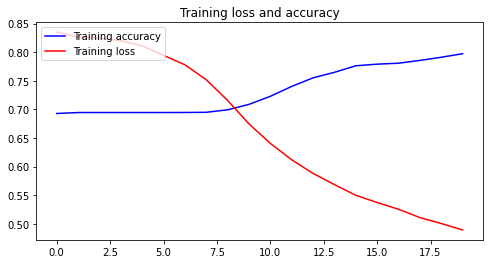

In [ ]:
# Membuat plot loss dan accuracy pada saat training dan validation
import matplotlib.pyplot as plt

# Membuat plot loss dan accuracy pada saat training
accur = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accur))
plt.figure(figsize=(8,4))
plt.plot(epochs, accur, 'b', label='Training accuracy')
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss and accuracy')
plt.legend(loc='upper left')
plt.show()

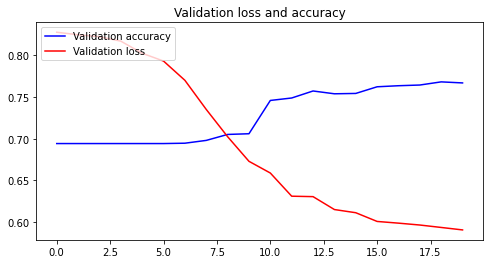

In [ ]:
# Membuat plot loss dan accuracy pada saat validation
val_accur = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(val_accur))
plt.figure(figsize=(8,4))
plt.plot(epochs, val_accur, 'b', label='Validation accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Validation loss and accuracy')
plt.legend(loc='upper left')
plt.show()